# Assessment - 1

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 1) Import pandas and read in the banklist.csv file into a dataframe called banks.

In [6]:
bank = pd.read_csv("C:\\Users\\PAYAL\\Downloads\\banklist.csv",encoding = 'latin-1')
bank


,Bank Name,City,ST,CERT,Acquiring Institution,Closing Date,Updated Date
0,Fayette County Bank,Saint Elmo,IL,1802,"United Fidelity Bank, fsb",26-May-17,26-Jul-17
1,"Guaranty Bank, (d/b/a BestBank in Georgia & Mi...",Milwaukee,WI,30003,First-Citizens Bank & Trust Company,5-May-17,26-Jul-17
2,First NBC Bank,New Orleans,LA,58302,Whitney Bank,28-Apr-17,26-Jul-17
3,Proficio Bank,Cottonwood Heights,UT,35495,Cache Valley Bank,3-Mar-17,18-May-17
4,Seaway Bank and Trust Company,Chicago,IL,19328,State Bank of Texas,27-Jan-17,18-May-17
...,...,...,...,...,...,...,...
548,"Superior Bank, FSB",Hinsdale,IL,32646,"Superior Federal, FSB",27-Jul-01,19-Aug-14
549,Malta National Bank,Malta,OH,6629,North Valley Bank,3-May-01,18-Nov-02
550,First Alliance Bank & Trust Co.,Manchester,NH,34264,Southern New Hampshire Bank & Trust,2-Feb-01,18-Feb-03
551,National State Bank of Metropolis,Metropolis,IL,3815,Banterra Bank of Marion,14-Dec-00,17-Mar-05


### 2) Show the head of the dataframe.

In [3]:
bank.head()

,Bank Name,City,ST,CERT,Acquiring Institution,Closing Date,Updated Date
0,Fayette County Bank,Saint Elmo,IL,1802,"United Fidelity Bank, fsb",26-May-17,26-Jul-17
1,"Guaranty Bank, (d/b/a BestBank in Georgia & Mi...",Milwaukee,WI,30003,First-Citizens Bank & Trust Company,5-May-17,26-Jul-17
2,First NBC Bank,New Orleans,LA,58302,Whitney Bank,28-Apr-17,26-Jul-17
3,Proficio Bank,Cottonwood Heights,UT,35495,Cache Valley Bank,3-Mar-17,18-May-17
4,Seaway Bank and Trust Company,Chicago,IL,19328,State Bank of Texas,27-Jan-17,18-May-17


### 3) What are the column names?

In [4]:
bank.columns

Index(['Bank Name', 'City', 'ST', 'CERT', 'Acquiring Institution',
       'Closing Date', 'Updated Date'],
      dtype='object')

### 4) How many States (ST) are represented in this data set?

In [5]:
bank['ST'].nunique()

44

### 5) Get a list or array of all the states in the data set.

In [6]:
states = bank['ST'].unique()
states

array(['IL', 'WI', 'LA', 'UT', 'NJ', 'AR', 'GA', 'PA', 'TN', 'WA', 'CO',
       'PR', 'FL', 'MN', 'CA', 'MD', 'OK', 'OH', 'SC', 'VA', 'ID', 'TX',
       'CT', 'AZ', 'NV', 'NC', 'KY', 'MO', 'KS', 'AL', 'MI', 'IN', 'IA',
       'NE', 'MS', 'NM', 'OR', 'NY', 'MA', 'SD', 'WY', 'WV', 'NH', 'HI'],
      dtype=object)

### 6) What are the top 5 states with the most failed banks?

In [7]:
bank['ST'].value_counts().head(5)

ST
GA    93
FL    75
IL    68
CA    41
MN    23
Name: count, dtype: int64

### 7) What are the top 5 acquiring institutions?

In [8]:
bank['Acquiring Institution'].value_counts().head(5)

Acquiring Institution
No Acquirer                            31
State Bank and Trust Company           12
First-Citizens Bank & Trust Company    11
Ameris Bank                            10
U.S. Bank N.A.                          9
Name: count, dtype: int64

### 8) How many banks has the State Bank of Texas acquired? How many of them were actually in Texas?

In [10]:
total_acquired = bank[bank["Acquiring Institution"]=="State Bank of Texas"]["Bank Name"].count()

texas_acquired = (bank.loc[(bank["Acquiring Institution"] == "State Bank of Texas") &(bank["ST"] == "TX"),"Bank Name"]).count()

print("Total banks acquired by State Bank of Texas:", total_acquired)
print("Banks acquired that were in Texas:", texas_acquired)


Total banks acquired by State Bank of Texas: 3
Banks acquired that were in Texas: 1


### 9) What is the most common city in California for a bank to fail in?

In [40]:
California_bank = bank[bank['ST'] == 'CA']

city_count = California_bank['City'].value_counts()

most_common_city = city_count.idxmax()

most_common_count = city_count.max()

print("Most common city in California for bank failure:", most_common_city)
print("Number of bank failures:", most_common_count)

Most common city in California for bank failure: Los Angeles
Number of bank failures: 4


# Assessment-2

In [12]:
df = pd.read_csv("C:\\Users\\PAYAL\\Downloads\\historical_automobile_sales.csv")
df

,Date,Year,Month,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales,Vehicle_Type,City
0,1/31/1980,1980,Jan,1,108.24,0.50,27483.571,1558,7,60.223,0.010000,5.4,456.0,Supperminicar,Georgia
1,2/29/1980,1980,Feb,1,98.75,0.75,24308.678,3048,4,45.986,-0.309594,4.8,555.9,Supperminicar,New York
2,3/31/1980,1980,Mar,1,107.48,0.20,28238.443,3137,3,35.141,-0.308614,3.4,620.0,Mediumfamilycar,New York
3,4/30/1980,1980,Apr,1,115.01,1.00,32615.149,1653,7,45.673,0.230596,4.2,702.8,Supperminicar,Illinois
4,5/31/1980,1980,May,1,98.72,0.20,23829.233,1319,4,52.997,0.138197,5.3,770.4,Smallfamiliycar,California
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
523,8/31/2023,2023,Aug,0,103.36,0.25,27852.993,1793,6,57.169,0.764155,2.6,1579.6,Executivecar,New York
524,9/30/2023,2023,Sep,0,101.55,0.07,21183.704,1028,5,59.315,0.036180,2.5,1123.4,Smallfamiliycar,California
525,10/31/2023,2023,Oct,0,124.66,0.12,15975.589,1148,9,19.472,-2.046169,2.5,1685.9,Sports,California
526,11/30/2023,2023,Nov,0,97.09,0.25,16862.288,4850,5,27.904,0.302179,2.9,2124.6,Smallfamiliycar,Georgia


### Q 1: Develop a Line chart using the functionality of pandas to show how automobile sales fluctuate from year to year.

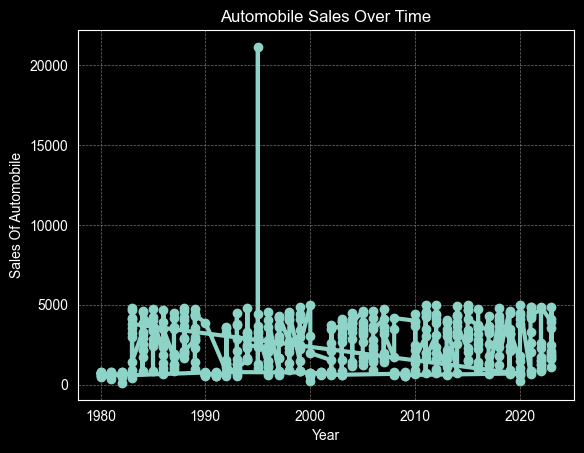

In [15]:
plt.plot(df['Year'],df['Automobile_Sales'], linestyle = '-',marker='o',linewidth = 3,label = 'Automobile_Sales')
plt.xlabel('Year')
plt.ylabel('Sales Of Automobile')
plt.title('Automobile Sales Over Time')
plt.grid(color='grey',linestyle='--',linewidth=0.5,alpha=0.9)
plt.show()

### Q 2: Plot different lines for categories of vehicle type and analyze the trend to answer the question Is there a noticeabledifference in sales trends between different vehicle types during recession periods?

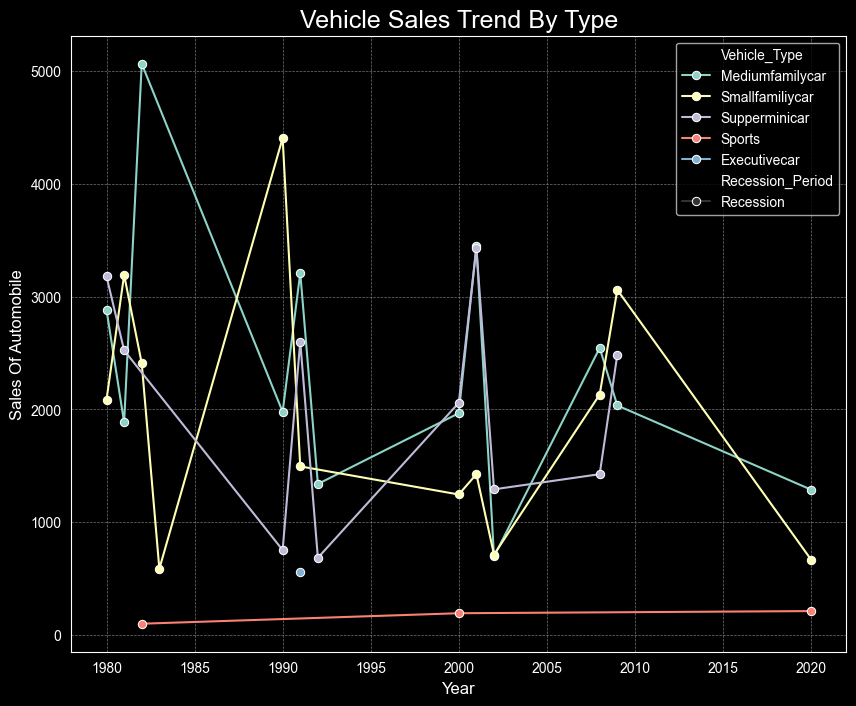

In [17]:
recession_data =df[df['Recession'] == 1]
df["Recession_Period"] = df['Recession'].map({1:'Recession', 0:'Non-Recession'})
grouped = recession_data.groupby(['Year','Vehicle_Type','Recession_Period'])['Automobile_Sales'].sum().reset_index()

plt.figure(figsize = (10,8))
sns.lineplot(data=grouped,x='Year',y='Automobile_Sales',hue='Vehicle_Type',marker='o',style='Recession_Period')
plt.xlabel('Year',fontsize = 12)
plt.ylabel('Sales Of Automobile',fontsize = 12)
plt.title('Vehicle Sales Trend By Type',fontsize=18)
plt.grid(color='grey',linestyle='--',linewidth=0.5,alpha=0.9)
plt.show()

### Q 3: Use the functionality of Seaborn Library to create a visualization to compare the sales trend per vehicle type for a recession period with a non- recession period.

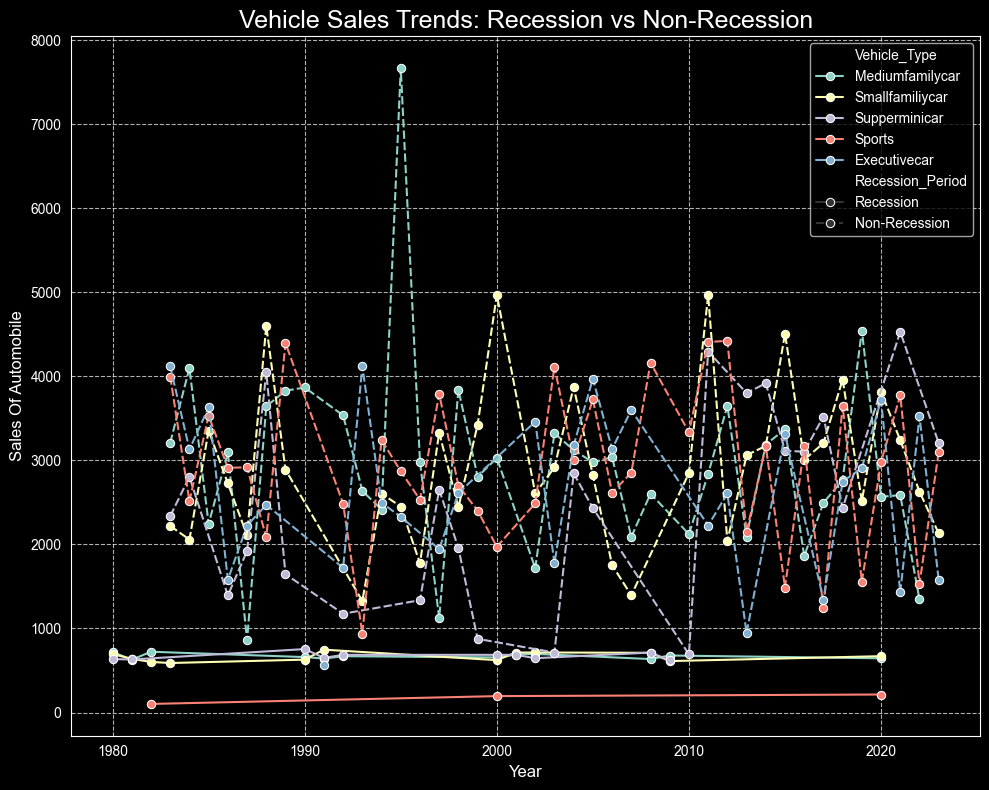

In [78]:
df["Recession_Period"] = df['Recession'].map({1:'Recession',0:'Non-Recession'})

df_group = df.groupby(['Year','Vehicle_Type','Recession_Period'])['Automobile_Sales'].mean().reset_index()

plt.figure(figsize=(10,8))
sns.lineplot(data=df_group,x='Year',y='Automobile_Sales',hue='Vehicle_Type',style='Recession_Period',marker='o')
plt.xlabel('Year',fontsize=12)
plt.ylabel('Sales Of Automobile',fontsize=12)
plt.title('Vehicle Sales Trends: Recession vs Non-Recession', fontsize=18)
plt.grid(True,linestyle='--',alpha=0.7)
plt.tight_layout()
plt.show()

### Q 4: Now you want to compare the sales of different vehicle types during a recession and a non-recession period

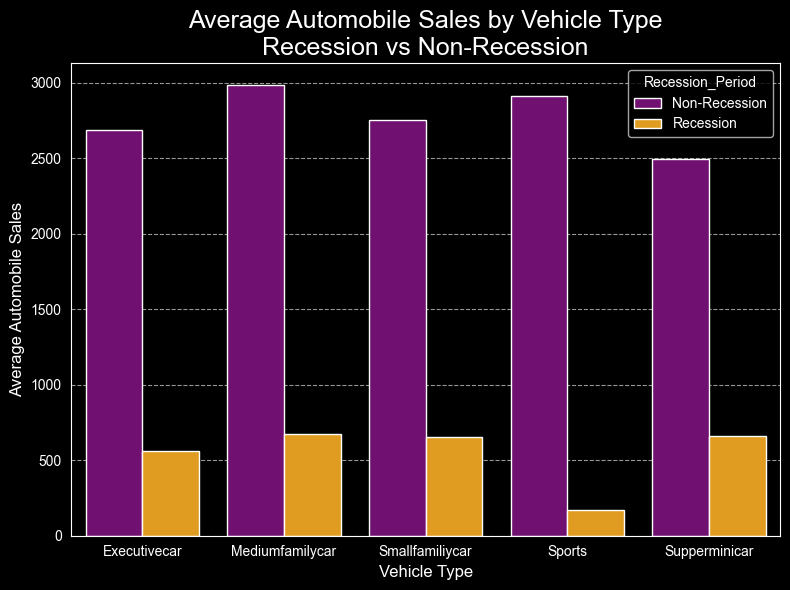

In [85]:
df['Recession_Period'] = df['Recession'].map({1:'Recession',0:'Non-Recession'})

df_bar = df.groupby(['Recession_Period','Vehicle_Type'])['Automobile_Sales'].mean().reset_index()

plt.figure(figsize=(8,6))
sns.barplot(data=df_bar,x='Vehicle_Type',y='Automobile_Sales',hue='Recession_Period',palette=['purple', 'orange'])
plt.title('Average Automobile Sales by Vehicle Type\nRecession vs Non-Recession', fontsize=18)
plt.xlabel('Vehicle Type', fontsize=12)
plt.ylabel('Average Automobile Sales', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()